In [1]:
import arc
from arc import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Latex
import scipy
h = scipy.constants.h

In [54]:
ns = np.arange(60,120)
deltas1 = []
deltas2 = []
deltas3 = []
deltas4 = []

jp1 = (3/2,3/2)
jp2 = (1/2,3/2)
jp3 = (3/2,1/2)
jp4 = (1/2,1/2)


for n in ns:
    calculation = arc.Rubidium()
    delta = calculation.getEnergyDefect(n, 0, 1/2, n, 1, jp1[0], n-1, 1, jp1[1])
    deltas1.append(delta/h/1e9)

    delta = calculation.getEnergyDefect(n, 0, 1/2, n, 1, jp2[0], n-1, 1, jp2[1])
    deltas2.append(delta/h/1e9)

    delta = calculation.getEnergyDefect(n, 0, 1/2, n, 1, jp3[0], n-1, 1, jp3[1])
    deltas3.append(delta/h/1e9)

    delta = calculation.getEnergyDefect(n, 0, 1/2, n, 1, jp4[0], n-1, 1, jp4[1])
    deltas4.append(delta/h/1e9)



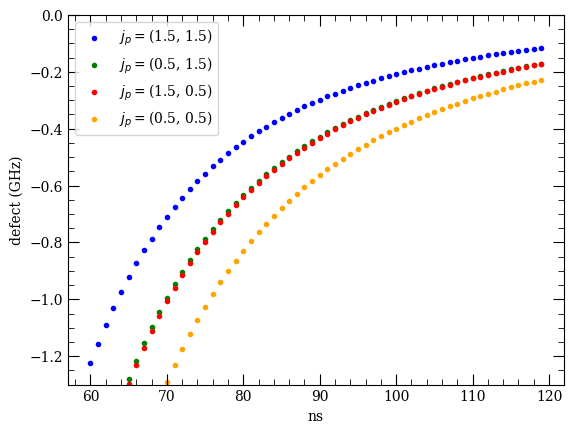

In [55]:
plt.figure()
plt.scatter(ns,deltas1, label='$j_p =$' + str(jp1), color = 'blue', marker='.')
plt.scatter(ns,deltas2, label='$j_p =$' + str(jp2), color = 'green', marker='.')
plt.scatter(ns,deltas3, label='$j_p =$' + str(jp3), color = 'red', marker='.')
plt.scatter(ns,deltas4, label='$j_p =$' + str(jp4), color = 'orange', marker='.')

plt.legend()
plt.ylabel('defect (GHz)')
plt.xlabel('ns')

plt.ylim([-1.3,0])

plt.show()

In [ ]:
deltas = []
na_nbs = []

In [2]:
ns = np.arange(30,140)
dif=2
deltas1 = []
deltas2 = []
deltas3 = []
deltas4 = []

jlabels = ('$j_{p1}$', '$j_{p2}$', '$j_{p3}$', '$j_{p4}$')
jp1 = (3/2,3/2)
jp2 = (1/2,3/2)
jp3 = (3/2,1/2)
jp4 = (1/2,1/2)

jps = [jp1,jp2,jp3,jp4]

for n in ns:
    nb = n+dif
    calculation = arc.Rubidium()
    delta = calculation.getEnergyDefect2(n, 0, 1/2, nb, 0, 1/2, n, 1, jp1[0], nb-1, 1, jp1[1])
    deltas1.append(delta/h/1e9)

    delta = calculation.getEnergyDefect2(n, 0, 1/2, nb, 0, 1/2, n, 1, jp2[0], nb-1, 1, jp2[1])
    deltas2.append(delta/h/1e9)

    delta = calculation.getEnergyDefect2(n, 0, 1/2, nb, 0, 1/2, n, 1, jp3[0], nb-1, 1, jp3[1])
    deltas3.append(delta/h/1e9)

    delta = calculation.getEnergyDefect2(n, 0, 1/2, nb, 0, 1/2, n, 1, jp4[0], nb-1, 1, jp4[1])
    deltas4.append(delta/h/1e9)



In [3]:
min_defects = [min(np.array(deltas1), key=abs), 
               min(np.array(deltas2), key=abs), 
               min(np.array(deltas3), key=abs), 
               min(np.array(deltas4), key=abs)]
assoc_ns = [ns[deltas1.index(min_defects[0])],
            ns[deltas2.index(min_defects[1])],
            ns[deltas3.index(min_defects[2])],
            ns[deltas4.index(min_defects[3])]]

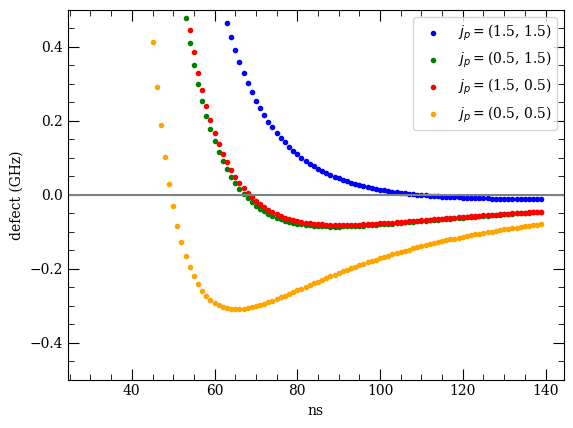

channel = |Rb 109s_1/2, Rb 111s_1/2> -> |Rb 109p_1.5, Rb 110p_1.5>
j_pa, j_pb = (1.5, 1.5)
min defect = 0.2416221473860041
n = 109
channel = |Rb 67s_1/2, Rb 69s_1/2> -> |Rb 67p_0.5, Rb 68p_1.5>
j_pa, j_pb = (0.5, 1.5)
min defect = 2.8190058675180176
n = 67
channel = |Rb 68s_1/2, Rb 70s_1/2> -> |Rb 68p_1.5, Rb 69p_0.5>
j_pa, j_pb = (1.5, 0.5)
min defect = 4.5780284176998105
n = 68
channel = |Rb 49s_1/2, Rb 51s_1/2> -> |Rb 49p_0.5, Rb 50p_0.5>
j_pa, j_pb = (0.5, 0.5)
min defect = 30.21899207300008
n = 49


In [4]:
plt.figure()
plt.scatter(ns,deltas1, label='$j_p =$' + str(jp1), color = 'blue', marker='.')
plt.scatter(ns,deltas2, label='$j_p =$' + str(jp2), color = 'green', marker='.')
plt.scatter(ns,deltas3, label='$j_p =$' + str(jp3), color = 'red', marker='.')
plt.scatter(ns,deltas4, label='$j_p =$' + str(jp4), color = 'orange', marker='.')

plt.axhline(y=0, color='grey')
plt.legend()
plt.ylabel('defect (GHz)')
plt.xlabel('ns')

plt.ylim([-0.5,0.5])

plt.show()
for i in range(4):
    print(f'channel = |Rb {assoc_ns[i]}s_1/2, Rb {assoc_ns[i]+dif}s_1/2> -> |Rb {assoc_ns[i]}p_{jps[i][0]}, Rb {assoc_ns[i]+dif-1}p_{str(jps[i][1])}>')
    print(f'j_pa, j_pb = {jps[i]}')
    print(f'min defect = {min_defects[i]*1e3}')
    print(f'n = {assoc_ns[i]}')



Calculating Hamiltonian matrix...


	matrix (dimension  3800 )

Matrix R3 100.0 % (state 932 of 932)



Diagonalizing interaction matrix...

99% Now we are plotting...


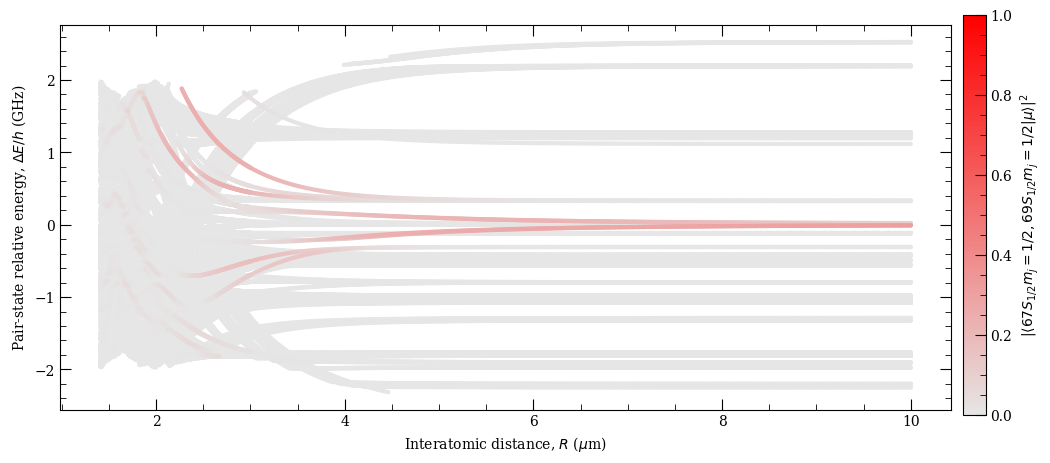

In [10]:
# C6 coefficient

pair = PairStateInteractions(Rubidium(), assoc_ns[1], 0, 1/2, assoc_ns[1]+dif, 0, 1/2, 1/2, 1/2)
C6 = pair.getC6perturbatively(0, 0, 2, min_defects[1]*1e6)

pair.defineBasis(0, 0, 1, 1, 25e9, progressOutput=True)

rvdw = pair.getLeRoyRadius()

r = np.append(np.linspace(rvdw, 3, 300), np.linspace(3.01, 10.0, 300))

nEig = 250
pair.diagonalise(r, nEig, progressOutput=True)

pair.plotLevelDiagram()



In [ ]:
pair.getC3fromLevelDiagram

In [11]:
pair.showPlot()

0

In [ ]:
# C3 coefficients


C3 = arc.Rubidium().getC3term(assoc_ns[i], 0, )